In [1]:
# Import liberaries
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import helper as my_mod
import os
from skimage import io
from scipy import signal

In [2]:
def displayImage(image,title):
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [3]:
def displayTwoConvImages(image1, title1, image2, title2):
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(1, 2, 1)
    plt.imshow(image1,cmap=plt.cm.gray)
    plt.title(title1)

    fig.add_subplot(1, 2, 2)
    plt.imshow(image2,cmap=plt.cm.gray)
    plt.title(title2)

In [4]:
# Dispaly two images side by side 
def displayTwoImage(image1, title1, image2, title2):
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB))
    plt.title(title1)
    fig.add_subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB))
    plt.title(title2)

In [5]:
# Dispaly three images side by side 
def displayThreeImage(image1, title1, image2, title2, image3, title3):
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB))
    plt.title(title1)
    fig.add_subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB))
    plt.title(title2)
    fig.add_subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(image3,cv2.COLOR_BGR2RGB))
    plt.title(title3)

In [6]:
# Dispaly four images side by side 
def displayFourImage(image1, title1, image2, title2, image3, title3, image4, title4):
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB))
    plt.title(title1)
    fig.add_subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB))
    plt.title(title2)
    fig.add_subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(image3,cv2.COLOR_BGR2RGB))
    plt.title(title3)
    fig.add_subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(image4,cv2.COLOR_BGR2RGB))
    plt.title(title4)

In [7]:
# Get name list of all files in directory
images = my_mod.listImages()

### Task 2.1: Load the set of images and display them as Grayscale and rgb images.

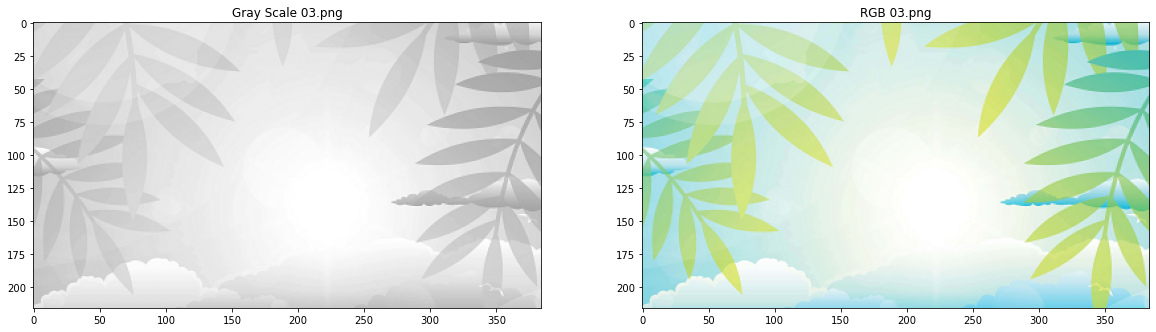

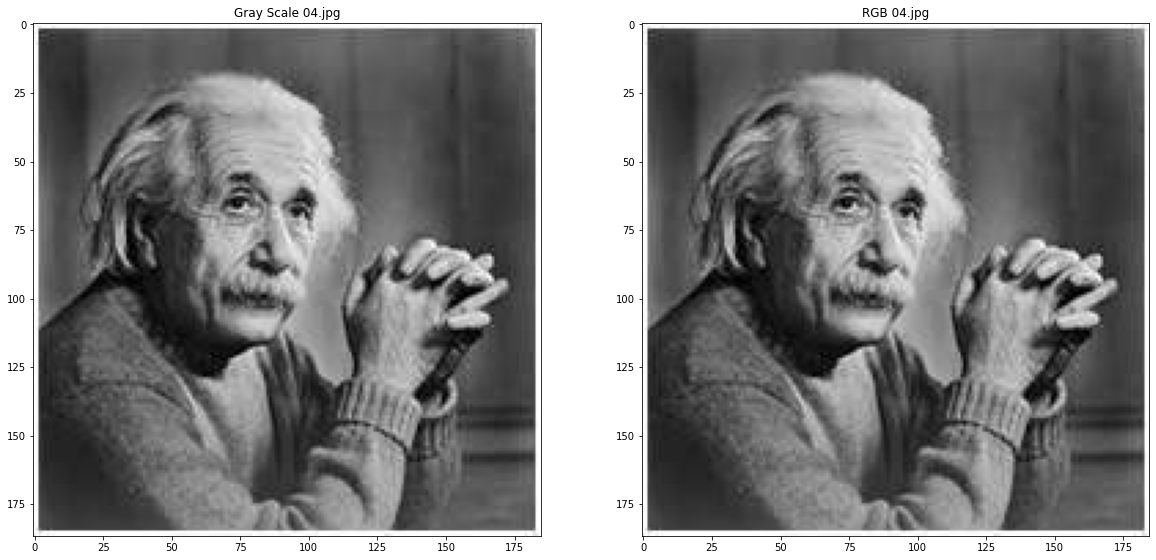

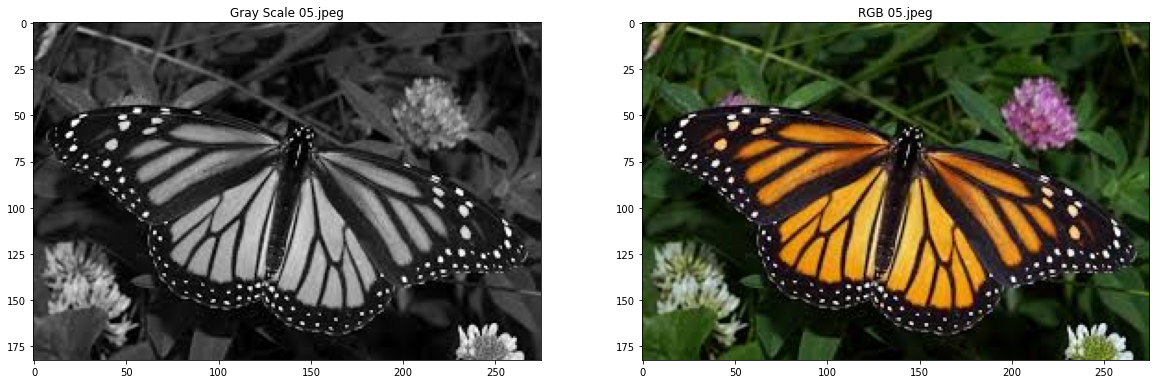

In [8]:
for image in images:
    imageG = cv2.imread(image,0)
    imageRGB = cv2.imread(image)
    displayTwoImage(imageG, "Gray Scale "+image, imageRGB, "RGB "+image)

### Task 2.2: Implement the function rgbExclusion()

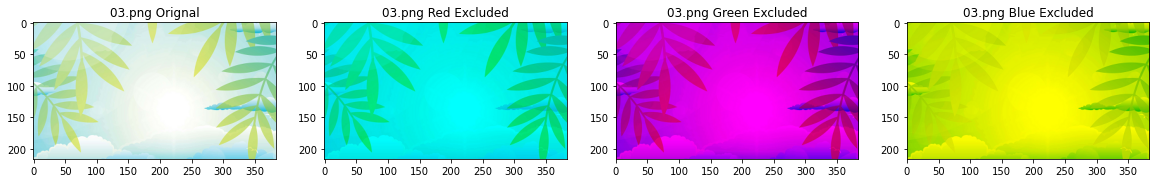

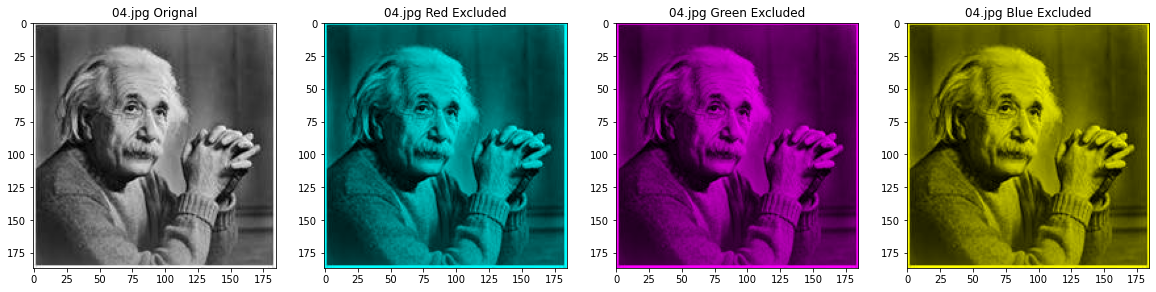

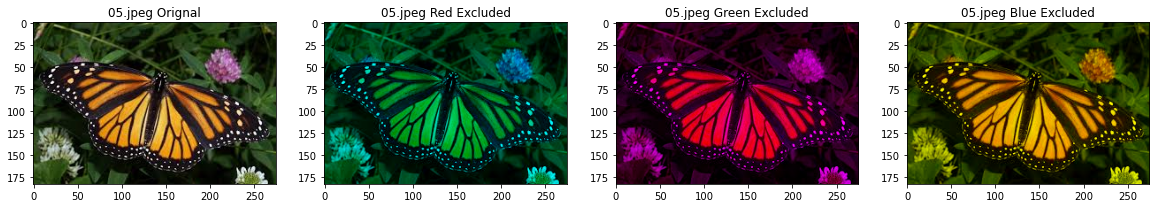

In [9]:
for image in images:
    src = cv2.imread(image, cv2.IMREAD_UNCHANGED)
    org = src.copy();
    buffR = src.copy();
    buffG = src.copy()
    buffB = src.copy()
    excRed = my_mod.rgbExclusion(buffR,'r')
    src = cv2.imread(image, cv2.IMREAD_UNCHANGED)
    excGreen = my_mod.rgbExclusion(buffG,'g')
    src = cv2.imread(image, cv2.IMREAD_UNCHANGED)
    excBlue = my_mod.rgbExclusion(buffB,'b')
    displayFourImage(org, image+" Orignal",excRed, image+" Red Excluded", excGreen, image+" Green Excluded", excBlue, image+" Blue Excluded")

### Task 2.3: Plot histograms before and after applying histogram equalization

In [ ]:
for image in images:
    org = cv2.imread(image,0)
    equ = cv2.equalizeHist(org)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(org,cv2.COLOR_BGR2RGB))
    plt.title("Gray Scale "+image)
    fig.add_subplot(2, 2, 2)
    plt.hist(org.ravel(),256,[0,256]);
    plt.title("Histogram of Gray Scale "+image)
    fig.add_subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(equ,cv2.COLOR_BGR2RGB))
    plt.title("Gray Scale Equalized "+image)
    fig.add_subplot(2, 2, 4)
    plt.hist(equ.ravel(),256,[0,256]);
    plt.title("Histogram of Gray Scale Equalized"+image)

### Task 2.4: Implement the convolution operation from scratch and compare with buid in

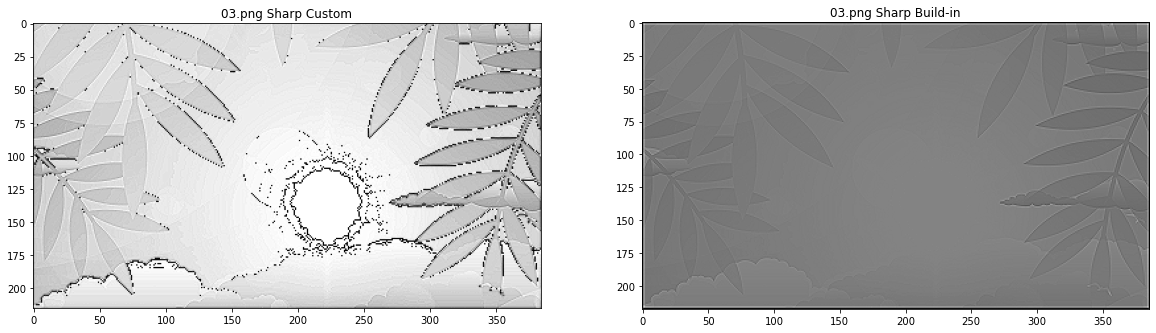

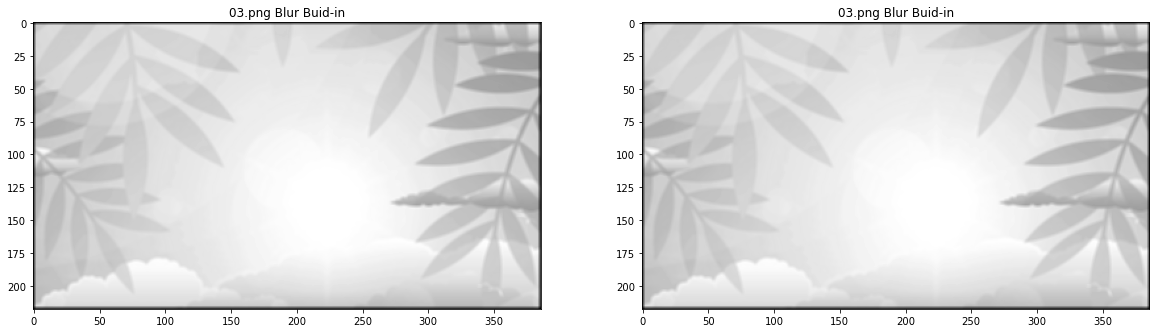

In [11]:
org = cv2.imread(images[0],0)

kernel_sharp = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
kernel_blur = np.ones((3,3),np.float32)/9 #blur

sharp_buff_cu = org.copy();
blur_buff_cu = org.copy();

sharp_buff_bi = org.copy();
blur_buff_bi = org.copy();

image_sharp_cu = my_mod.myConvolve2d(sharp_buff_cu,kernel_sharp)
image_blur_cu = my_mod.myConvolve2d(blur_buff_cu,kernel_blur)

image_sharp_bi = signal.convolve2d(sharp_buff_bi, kernel_sharp)
image_blur_bi = signal.convolve2d(blur_buff_bi, kernel_blur)

displayTwoConvImages(image_sharp_cu, images[0]+" Sharp Custom", image_sharp_bi, images[0]+" Sharp Build-in")
displayTwoConvImages(image_blur_bi, images[0]+" Blur Buid-in", image_blur_bi, images[0]+" Blur Buid-in")

### Task  